<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [15]:
data = pd.read_csv('/content/drive/MyDrive/DLS advanced course/Week_1_noDL/Competition_2/train.csv')

In [16]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

1) Посмотрите на случайные строчки

In [20]:
data.sample(8)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3240,71,24.85,1901,Male,1,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2841,4,75.35,273.4,Male,1,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,0
1235,71,19.90,1389.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4688,2,60.85,111.4,Female,0,No,No,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,0
2391,35,19.15,638,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3796,59,110.15,6448.05,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
1392,31,59.95,1848.8,Male,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,0
3885,65,94.55,6078.75,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0


2) Посмотрите, есть ли в датасете незаполненные значения

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [51]:
data.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [22]:
data.isnull().sum().sum()

0

Коммент: конкретно nan нет, но колонка TotalSpent, кот-я должна быть числовой, имеет тип object, и в ней присутствуют "грязные" данные  
Почистим их на следующием шаге

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Числовые

In [23]:
# сначала колонку TotalSpent превратим в числовую, сделав nan там, где неправильное число

data['TotalSpent'] = data['TotalSpent'].apply(pd.to_numeric, errors='coerce')

In [24]:
data[data['TotalSpent'].isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Заменим на среднее

In [25]:
data['TotalSpent'].fillna(data['TotalSpent'].mean(), inplace=True)

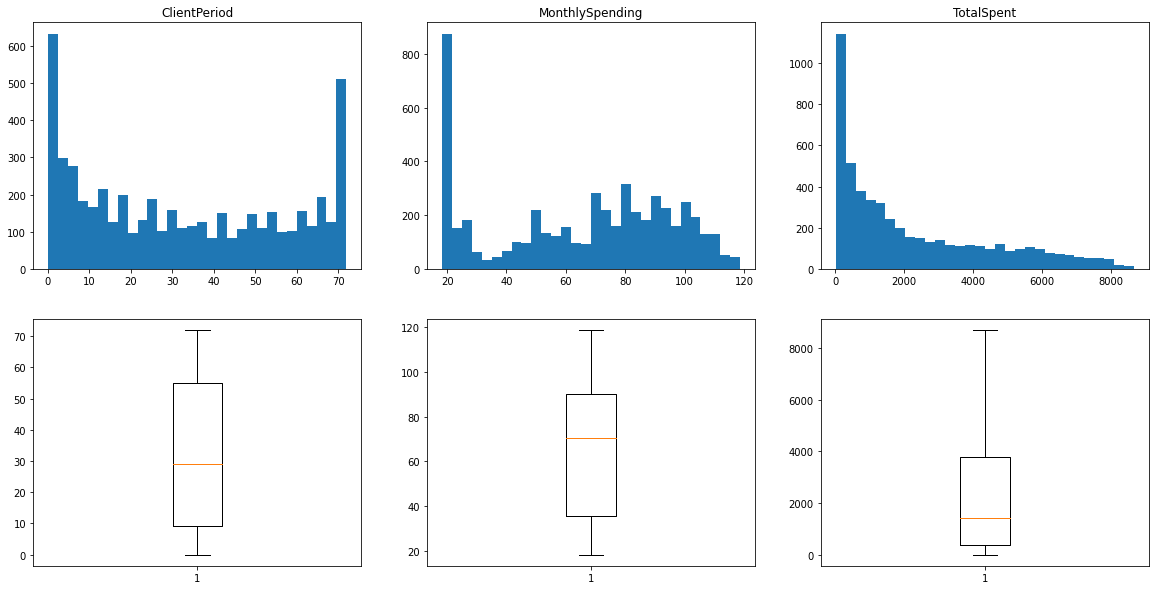

In [39]:
# 1
%matplotlib inline


fig, axs = plt.subplots(2,len(num_cols), figsize=(20,10))

for i,j in enumerate(num_cols):
    axs[0,i].hist(data[j], bins = 30)
    axs[0,i].set_title(j)
    axs[1, i].boxplot(data[j])



Категориальные

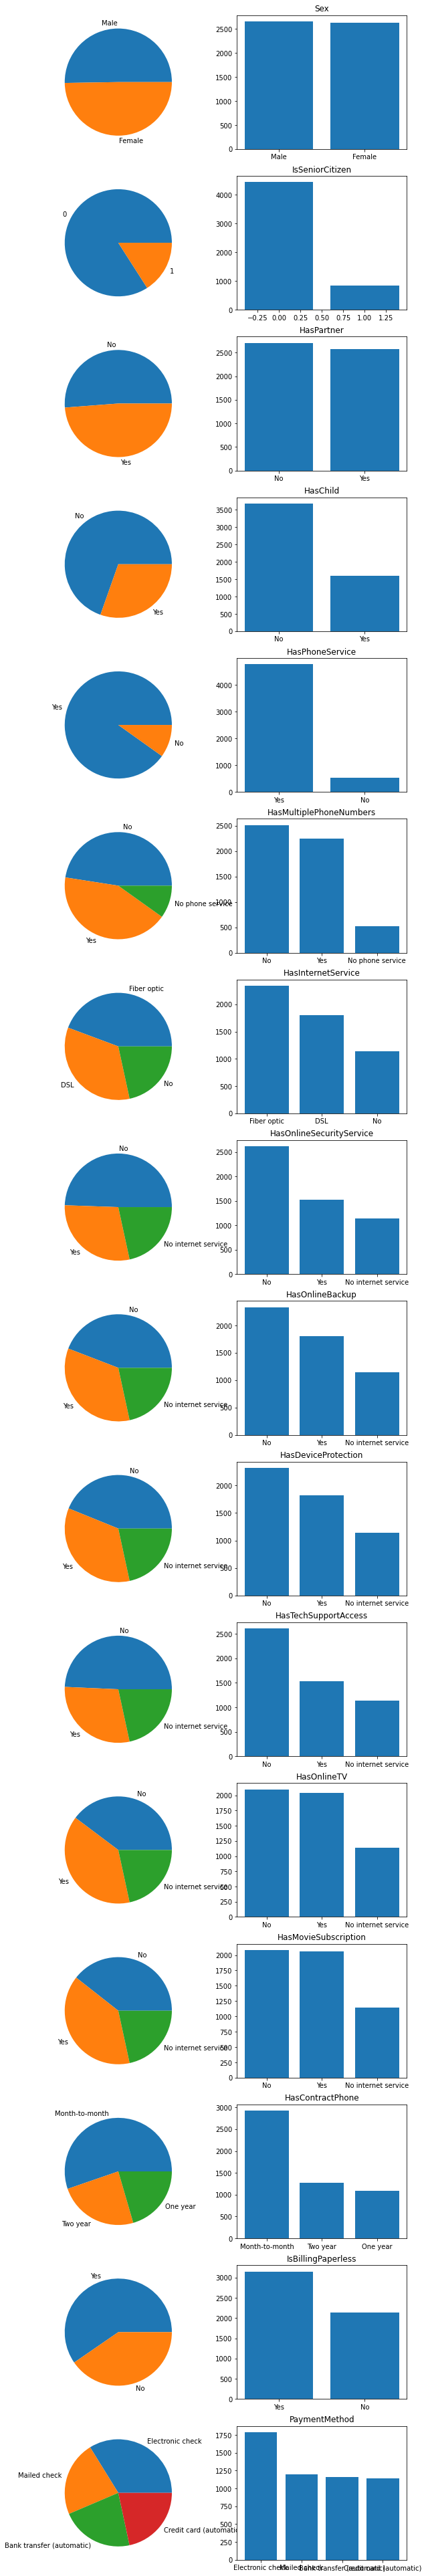

In [53]:
fig, axs = plt.subplots(len(cat_cols),2, figsize=(10,70))

for i,j in enumerate(cat_cols):
    a = data[j].value_counts()
    axs[i,0].pie(a.values, labels = a.index)
    axs[i,1].bar(a.index, a.values)
    axs[i,1].set_title(j)


In [48]:
for i in cat_cols:
    print('\n', data[i].value_counts())


 Male      2655
Female    2627
Name: Sex, dtype: int64

 0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

 No     2705
Yes    2577
Name: HasPartner, dtype: int64

 No     3676
Yes    1606
Name: HasChild, dtype: int64

 Yes    4761
No      521
Name: HasPhoneService, dtype: int64

 No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

 Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

 No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

 No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

 No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

 No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAcces

### 2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными

In [49]:
data[target_col].value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

Ответ: да, классы несбалансированные

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
уже исправил атрибут TotalSpent

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [54]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Сначала делаем трейн и тест, потом применяем нормировку

In [55]:
numeric_data = data[num_cols]

categorial_data = data[cat_cols]

In [56]:
# One hot encoding

dummy_features = pd.get_dummies(categorial_data)

In [58]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [57]:
y = data[target_col]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

Нормируем

In [62]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Лог регрессия

In [65]:
clf = LogisticRegression()

In [66]:
parameters = {'C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}

In [67]:
CV_model = GridSearchCV(estimator=clf, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=10, 
                            verbose=10)

In [68]:
CV_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done  15 out of  30 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=10)]: Done  19 out of  30 | elapsed:    4.8s remaining:    2.8s
[Parallel(n_jobs=10)]: Done  23 out of  30 | elapsed:    4.9s remaining:    1.5s
[Parallel(n_jobs=10)]: Done  27 out of  30 | elapsed:    5.6s remaining:    0.6s
[Parallel(n_jobs=10)]: Done  30 out of  30 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=10,
             param_grid={'C': array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [69]:
CV_model.best_params_

{'C': 10.0}

In [70]:
CV_model.cv_results_['mean_test_score']

array([0.84863342, 0.84865229, 0.84846521, 0.84742626, 0.84580596,
       0.84019092])

Применяем на валидацию

In [72]:
roc_auc_score(y_test, CV_model.best_estimator_.predict(X_test_scaled))

0.6828529474238324

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Ответ: лучший параметр 'C': 10.0, лучшее качество на трейне около 0.84, на тесте 0.68

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [78]:
!pip install catboost

     |████████████████████████████████| 67.3MB 62kB/s 


In [79]:
from catboost import CatBoostClassifier, Pool, cv

Делим исходную выборку на трейн валидейт

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols].values, data[target_col].values, 
                                                    train_size=0.8,
                                                    random_state=42)

Номера кат-х колонок

In [81]:
cc = []
for i,j in enumerate(data.columns):
    if j in cat_cols:
        cc.append(i)

In [91]:
cc

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [92]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [83]:
model = CatBoostClassifier(
    #custom_metric=['AUC','Logloss'],
    random_seed=42,
    logging_level='Silent'
)

In [84]:
model.fit(
    X_train, y_train,
    cat_features=cc,
    eval_set=(X_test, y_test),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
model.get_all_params()

In [85]:
model.get_best_score()

{'learn': {'Logloss': 0.23365429609344082},
 'validation': {'Logloss': 0.42947594251591464}}

In [150]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])

[1 0 0 0 0 0 0 1 0 0]
[[0.47366667 0.52633333]
 [0.74820882 0.25179118]
 [0.74404676 0.25595324]
 [0.93268697 0.06731303]
 [0.98278876 0.01721124]
 [0.70717138 0.29282862]
 [0.9515892  0.0484108 ]
 [0.10125998 0.89874002]
 [0.75285843 0.24714157]
 [0.60147884 0.39852116]]


In [87]:
roc_auc_score(y_test, model.predict(X_test))

0.6746289746123513

In [89]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [95]:
model2 = CatBoostClassifier(
    #custom_metric=['AUC','Logloss'],
    random_seed=42,
    logging_level='Silent')

X2 = Pool(X_train, label = y_train, cat_features = cc)

In [96]:
grid_search_result = model2.grid_search(grid, 
                                       X=X2,  
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.4176966	best: 0.4176966 (0)	total: 8.85s	remaining: 4m 16s
1:	loss: 0.4200064	best: 0.4176966 (0)	total: 17.8s	remaining: 4m 8s
2:	loss: 0.4194263	best: 0.4176966 (0)	total: 26.3s	remaining: 3m 56s
3:	loss: 0.4170155	best: 0.4170155 (3)	total: 35.2s	remaining: 3m 49s
4:	loss: 0.4192213	best: 0.4170155 (3)	total: 43.7s	remaining: 3m 38s
5:	loss: 0.4186839	best: 0.4170155 (3)	total: 52.7s	remaining: 3m 30s
6:	loss: 0.4182985	best: 0.4170155 (3)	total: 1m 1s	remaining: 3m 20s
7:	loss: 0.4164841	best: 0.4164841 (7)	total: 1m 9s	remaining: 3m 12s
8:	loss: 0.4188257	best: 0.4164841 (7)	total: 1m 18s	remaining: 3m 2s
9:	loss: 0.4177677	best: 0.4164841 (7)	total: 1m 27s	remaining: 2m 54s
10:	loss: 0.4257412	best: 0.4164841 (7)	total: 1m 41s	remaining: 2m 55s
11:	loss: 0.4263643	best: 0.4164841 (7)	total: 1m 56s	remaining: 2m 55s
12:	loss: 0.4227263	best: 0.4164841 (7)	total: 2m 11s	remaining: 2m 51s
13:	loss: 0.4242871	best: 0.4164841 (7)	total: 2m 26s	remaining: 2m 47s
14:	loss: 0.

In [102]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

In [103]:
roc_auc_score(y_test, model2.predict(X_test))

0.6670537767475364

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Ответ: На валидации 0.67 'это меньше, чем для линейной модели, попробую другую модель

##### Другая модель

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators': np.array([50,100,500,1000,2000])}

CV_model_rf = GridSearchCV(estimator=clf_rf, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=10, 
                            verbose=10)

In [107]:
CV_model_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done   9 out of  25 | elapsed:   11.9s remaining:   21.1s
[Parallel(n_jobs=10)]: Done  12 out of  25 | elapsed:   25.6s remaining:   27.7s
[Parallel(n_jobs=10)]: Done  15 out of  25 | elapsed:   26.0s remaining:   17.3s
[Parallel(n_jobs=10)]: Done  18 out of  25 | elapsed:   52.7s remaining:   20.5s
[Parallel(n_jobs=10)]: Done  21 out of  25 | elapsed:  1.3min remaining:   14.9s
[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [108]:
CV_model_rf.best_params_

{'n_estimators': 2000}

In [109]:
CV_model_rf.cv_results_['mean_test_score']

array([0.82052151, 0.8199125 , 0.82200792, 0.82308422, 0.82371367])

In [110]:
roc_auc_score(y_test, CV_model_rf.best_estimator_.predict(X_test_scaled))

0.6651213047533732

In [138]:
clf_rf2 = RandomForestClassifier(n_estimators = 2000)
clf_rf2.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
roc_auc_score(y_test, clf_rf2.predict(X_test_scaled))

0.6649943203332072

Результат рандом форест 0.66 примерно такой же

# Предсказания

In [159]:
best_model = model

In [160]:
X_real_test = pd.read_csv('/content/drive/MyDrive/DLS advanced course/Week_1_noDL/Competition_2/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/DLS advanced course/Week_1_noDL/Competition_2/submission.csv')

In [161]:
X_real_test['TotalSpent'] = X_real_test['TotalSpent'].apply(pd.to_numeric, errors='coerce')
X_real_test['TotalSpent'].fillna(X_real_test['TotalSpent'].mean(), inplace=True)

In [162]:
'''numeric_data = X_real_test[num_cols]
categorial_data = X_real_test[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
X_scor = pd.concat([numeric_data, dummy_features], axis=1)

scaler = StandardScaler()
X_scor_scaled = scaler.fit_transform(X_scor)

In [163]:
a = model.predict_proba(X_real_test)

In [164]:
a[:,1]

array([0.04044941, 0.74716857, 0.6838017 , ..., 0.74689284, 0.6768444 ,
       0.00762625])

In [165]:
submission['Churn'] = a[:,1]

In [166]:
submission

,Id,Churn
0,0,0.040449
1,1,0.747169
2,2,0.683802
3,3,0.005978
4,4,0.001251
...,...,...
1756,1756,0.084699
1757,1757,0.023446
1758,1758,0.746893
1759,1759,0.676844


In [167]:
submission.to_csv('/content/drive/MyDrive/DLS advanced course/Week_1_noDL/Competition_2/my_submission_logt1.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

## Скор на кагле **0.85146**, team name = Владимир Дюкарев